## Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
url = "https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv"
dataset_train = pd.read_csv(url)
training_set = dataset_train.iloc[:, 1:2].values

In [3]:
dataset_train.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [4]:
dataset_train.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56


In [5]:
data_close = dataset_train['Close']

In [6]:
data_close

0       233.75
1       233.25
2       234.25
3       236.10
4       233.30
         ...  
2030    118.65
2031    117.60
2032    120.65
2033    120.90
2034    121.55
Name: Close, Length: 2035, dtype: float64

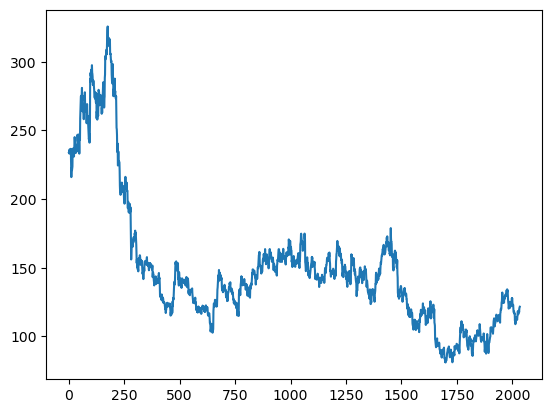

In [7]:
plt.plot(data_close)

## Normalization

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler =  MinMaxScaler(feature_range = (0,1))
data_close = scaler.fit_transform(np.array(data_close).reshape(-1,1))

In [9]:
data_close.shape

(2035, 1)

In [10]:
print(data_close)

[[0.62418301]
 [0.62214052]
 [0.62622549]
 ...
 [0.1621732 ]
 [0.16319444]
 [0.16584967]]


## Train and test Split

In [11]:
training_size = int(len(data_close)*0.75)
test_size = len(data_close) - training_size
train_data, test_data = data_close[0:training_size,:], data_close[training_size:len(data_close),:1]

In [12]:
def create_dataset(dataset,time_step =1):
    dataX, dataY = [],[]
    for i in range(len(dataset) - time_step -1):
        a = dataset[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(dataset[i+time_step,0])
    return np.array(dataX), np.array(dataY)

In [13]:
time_step = 100
x_train , y_train = create_dataset(train_data,time_step)
x_test, y_test = create_dataset(test_data,time_step)

In [14]:
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1],1)

In [16]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense
model = Sequential()
model.add(LSTM(50,return_sequences = True , input_shape = (100,1)))
model.add(LSTM(50,return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


model.fit

In [19]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
23/23 [==============================] - 30s 538ms/step - loss: 0.0181 - val_loss: 0.0073
Epoch 2/100
23/23 [==============================] - 8s 360ms/step - loss: 0.0029 - val_loss: 8.0000e-04
Epoch 3/100
23/23 [==============================] - 8s 358ms/step - loss: 0.0016 - val_loss: 0.0013
Epoch 4/100
23/23 [==============================] - 8s 359ms/step - loss: 0.0015 - val_loss: 9.3603e-04
Epoch 5/100
23/23 [==============================] - 6s 268ms/step - loss: 0.0015 - val_loss: 0.0012
Epoch 6/100
23/23 [==============================] - 8s 339ms/step - loss: 0.0014 - val_loss: 0.0012
Epoch 7/100
23/23 [==============================] - 8s 332ms/step - loss: 0.0013 - val_loss: 9.4298e-04
Epoch 8/100
23/23 [==============================] - 7s 310ms/step - loss: 0.0013 - val_loss: 8.9759e-04
Epoch 9/100
23/23 [==============================] - 7s 317ms/step - loss: 0.0012 - val_loss: 9.9514e-04
Epoch 10/100
23/23 [==============================] - 8s 339ms/step - 

23/23 [==============================] - 8s 361ms/step - loss: 2.9293e-04 - val_loss: 2.4868e-04
Epoch 77/100
23/23 [==============================] - 8s 328ms/step - loss: 3.5644e-04 - val_loss: 2.2932e-04
Epoch 78/100
23/23 [==============================] - 7s 319ms/step - loss: 2.6439e-04 - val_loss: 2.2391e-04
Epoch 79/100
23/23 [==============================] - 8s 372ms/step - loss: 2.6681e-04 - val_loss: 2.2528e-04
Epoch 80/100
23/23 [==============================] - 9s 375ms/step - loss: 2.6503e-04 - val_loss: 2.1969e-04
Epoch 81/100
23/23 [==============================] - 9s 371ms/step - loss: 2.9166e-04 - val_loss: 2.6093e-04
Epoch 82/100
23/23 [==============================] - 8s 357ms/step - loss: 2.5675e-04 - val_loss: 2.7380e-04
Epoch 83/100
23/23 [==============================] - 9s 376ms/step - loss: 2.4764e-04 - val_loss: 2.5289e-04
Epoch 84/100
23/23 [==============================] - 9s 375ms/step - loss: 2.5877e-04 - val_loss: 2.2200e-04
Epoch 85/100
23/23 [===

In [20]:
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

13/13 [==============================] - 1s 85ms/step


In [21]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [22]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

161.8389400262508

In [23]:
math.sqrt(mean_squared_error(y_test,test_predict))

105.77394324793215

## Plottting

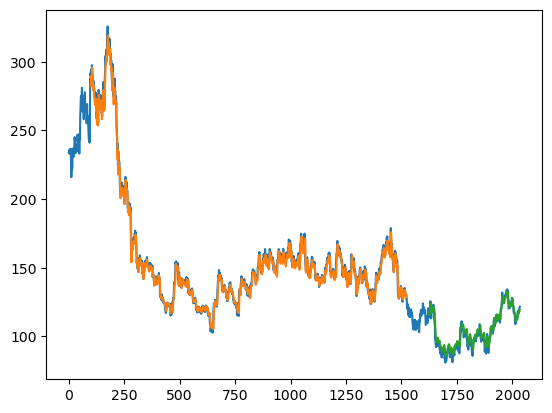

In [26]:
look_back = 100
trainPredictPlot = np.empty_like(data_close)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

testPredictPlot = np.empty_like(data_close)
testPredictPlot[:,:] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(data_close)-1,:] = test_predict

plt.plot(scaler.inverse_transform(data_close))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [28]:
len(test_data),x_test.shape

(509, (408, 100, 1))

In [29]:
x_input = test_data[409:].reshape(1,-1)
x_input.shape

(1, 100)

In [31]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

In [33]:
lst_output=[]
n_steps =100
nextNumberOfDays = 30
i=0

while(i<nextNumberOfDays):
    if(len(temp_input)>100):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input=x_input.reshape((1,n_steps,1))
        yhat = model.predict(x_input,verbose=0)
        print("{}day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1,n_steps,1))
        yhat = model.predict(x_input,verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
        
print(lst_output)

[0.16458246]
101
1 day input [0.13848039 0.14011438 0.13888889 0.13541667 0.14011438 0.1380719
 0.13071895 0.13071895 0.12867647 0.11846405 0.14644608 0.14808007
 0.15910948 0.15992647 0.15788399 0.16441993 0.17892157 0.17933007
 0.19260621 0.20812908 0.18974673 0.18055556 0.18239379 0.17708333
 0.17810458 0.18055556 0.17810458 0.17851307 0.19607843 0.18913399
 0.18954248 0.19403595 0.19444444 0.20200163 0.19771242 0.19934641
 0.19873366 0.1997549  0.2128268  0.21568627 0.20445261 0.21772876
 0.21098856 0.21425654 0.19750817 0.18811275 0.17851307 0.17381536
 0.16033497 0.16564542 0.17116013 0.17422386 0.18035131 0.17401961
 0.16278595 0.16973039 0.17810458 0.17034314 0.16830065 0.17279412
 0.17544935 0.18382353 0.19138072 0.18913399 0.19097222 0.17238562
 0.16830065 0.1693219  0.17177288 0.16156046 0.14971405 0.1503268
 0.15196078 0.14726307 0.14501634 0.14603758 0.12479575 0.13112745
 0.11397059 0.1190768  0.12377451 0.13562092 0.12908497 0.13459967
 0.12806373 0.13031046 0.12724673 0

8day output [[0.1659492]]
9 day input [0.12867647 0.11846405 0.14644608 0.14808007 0.15910948 0.15992647
 0.15788399 0.16441993 0.17892157 0.17933007 0.19260621 0.20812908
 0.18974673 0.18055556 0.18239379 0.17708333 0.17810458 0.18055556
 0.17810458 0.17851307 0.19607843 0.18913399 0.18954248 0.19403595
 0.19444444 0.20200163 0.19771242 0.19934641 0.19873366 0.1997549
 0.2128268  0.21568627 0.20445261 0.21772876 0.21098856 0.21425654
 0.19750817 0.18811275 0.17851307 0.17381536 0.16033497 0.16564542
 0.17116013 0.17422386 0.18035131 0.17401961 0.16278595 0.16973039
 0.17810458 0.17034314 0.16830065 0.17279412 0.17544935 0.18382353
 0.19138072 0.18913399 0.19097222 0.17238562 0.16830065 0.1693219
 0.17177288 0.16156046 0.14971405 0.1503268  0.15196078 0.14726307
 0.14501634 0.14603758 0.12479575 0.13112745 0.11397059 0.1190768
 0.12377451 0.13562092 0.12908497 0.13459967 0.12806373 0.13031046
 0.12724673 0.13521242 0.14522059 0.15257353 0.14848856 0.14338235
 0.14562908 0.15236928 0.15

16day output [[0.1665618]]
17 day input [0.17892157 0.17933007 0.19260621 0.20812908 0.18974673 0.18055556
 0.18239379 0.17708333 0.17810458 0.18055556 0.17810458 0.17851307
 0.19607843 0.18913399 0.18954248 0.19403595 0.19444444 0.20200163
 0.19771242 0.19934641 0.19873366 0.1997549  0.2128268  0.21568627
 0.20445261 0.21772876 0.21098856 0.21425654 0.19750817 0.18811275
 0.17851307 0.17381536 0.16033497 0.16564542 0.17116013 0.17422386
 0.18035131 0.17401961 0.16278595 0.16973039 0.17810458 0.17034314
 0.16830065 0.17279412 0.17544935 0.18382353 0.19138072 0.18913399
 0.19097222 0.17238562 0.16830065 0.1693219  0.17177288 0.16156046
 0.14971405 0.1503268  0.15196078 0.14726307 0.14501634 0.14603758
 0.12479575 0.13112745 0.11397059 0.1190768  0.12377451 0.13562092
 0.12908497 0.13459967 0.12806373 0.13031046 0.12724673 0.13521242
 0.14522059 0.15257353 0.14848856 0.14338235 0.14562908 0.15236928
 0.15400327 0.14971405 0.1621732  0.16319444 0.16584967 0.16458246
 0.16589735 0.16611533

24day output [[0.16737783]]
25 day input [0.17810458 0.18055556 0.17810458 0.17851307 0.19607843 0.18913399
 0.18954248 0.19403595 0.19444444 0.20200163 0.19771242 0.19934641
 0.19873366 0.1997549  0.2128268  0.21568627 0.20445261 0.21772876
 0.21098856 0.21425654 0.19750817 0.18811275 0.17851307 0.17381536
 0.16033497 0.16564542 0.17116013 0.17422386 0.18035131 0.17401961
 0.16278595 0.16973039 0.17810458 0.17034314 0.16830065 0.17279412
 0.17544935 0.18382353 0.19138072 0.18913399 0.19097222 0.17238562
 0.16830065 0.1693219  0.17177288 0.16156046 0.14971405 0.1503268
 0.15196078 0.14726307 0.14501634 0.14603758 0.12479575 0.13112745
 0.11397059 0.1190768  0.12377451 0.13562092 0.12908497 0.13459967
 0.12806373 0.13031046 0.12724673 0.13521242 0.14522059 0.15257353
 0.14848856 0.14338235 0.14562908 0.15236928 0.15400327 0.14971405
 0.1621732  0.16319444 0.16584967 0.16458246 0.16589735 0.16611533
 0.16605471 0.16598524 0.16594577 0.1659288  0.16592994 0.1659492
 0.16598621 0.16603938 

In [34]:
day_new = np.arange(1,101)

day_pred = np.arange(101,131)


In [35]:
df3 = data_close.tolist()
df3.extend(lst_output)

In [36]:
len(data_close)

2035

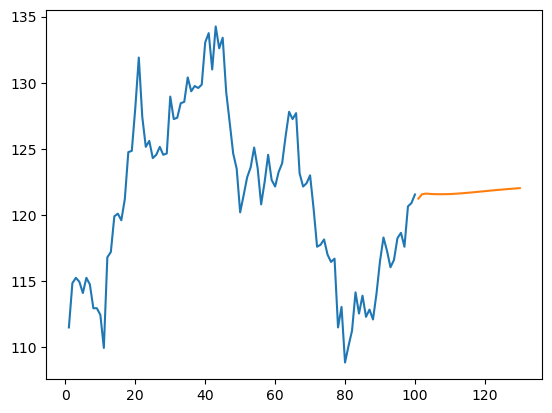

In [37]:
plt.plot(day_new,scaler.inverse_transform(data_close[1935:]))
plt.plot(day_pred, scaler.inverse_transform(lst_output))